In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
from PIL import Image

# prepare image + question
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
text = "How many cats are there?"

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")

# prepare inputs
encoding = processor(image, text, return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits
idx = logits.argmax(-1).item()



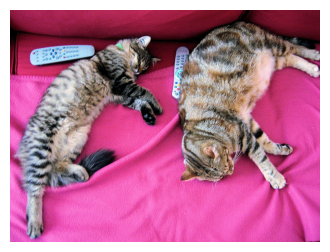

How many cats are there?
Predicted answer: 2


In [ ]:
import matplotlib.pyplot as plt
import  cv2


image = image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.axis('off')
plt.show()
print(f'{text}')
print("Predicted answer:", model.config.id2label[idx])
